In [373]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
import ZebraLib as zb
from scipy.optimize import curve_fit
import uncertainties.unumpy as un

import sys
sys.path.append('D:/UNESP/EngMec-UNESP/')
import frankenstein as fk

### Dados medidos

In [374]:
def reta_calibration(E):
    return 22.819*E + 4.229

#dados
df_E = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TCM II/Lab 2 - convecção dentro de tubos/dados.xlsx', sheet_name='tensão')
df_aux = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TCM II/Lab 2 - convecção dentro de tubos/dados.xlsx', sheet_name='aux')

In [375]:
df_E

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12
0,1.55,2.10,2.20,2.11,1.98,2.01,1.89,1.76,1.75,1.60,1.20,0.97
1,1.61,2.16,2.26,2.16,2.04,2.06,1.94,1.82,1.80,1.63,1.23,0.99
2,1.73,2.34,2.46,2.35,2.20,2.21,2.07,2.02,1.88,1.68,1.28,1.00
3,1.64,2.20,2.30,2.20,2.08,2.08,1.99,1.96,1.85,1.67,1.27,1.01
4,1.63,2.21,2.32,2.22,2.10,2.10,2.01,1.98,1.87,1.67,1.27,1.02
5,1.66,2.26,2.38,2.28,2.16,2.15,2.05,2.02,1.91,1.70,1.28,1.01
6,1.66,2.29,2.43,2.23,2.22,2.19,2.11,2.07,1.97,1.77,1.34,1.06
7,1.74,2.37,2.51,2.40,2.27,2.25,2.16,2.12,2.00,1.79,1.34,1.04
8,1.77,2.42,2.58,2.45,2.32,2.29,2.19,2.14,2.02,1.80,1.34,1.02
9,1.84,2.54,2.69,2.58,2.43,2.40,2.29,2.23,2.10,1.85,1.37,1.01


In [376]:
reta_calibration(df_E)

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12
0,39.59845,52.14890,54.43080,52.37709,49.41062,50.09519,47.35691,44.39044,44.16225,40.73940,31.61180,26.36343
1,40.96759,53.51804,55.79994,53.51804,50.77976,51.23614,48.49786,45.75958,45.30320,41.42397,32.29637,26.81981
2,43.70587,57.62546,60.36374,57.85365,54.43080,54.65899,51.46433,50.32338,47.12872,42.56492,33.43732,27.04800
3,41.65216,54.43080,56.71270,54.43080,51.69252,51.69252,49.63881,48.95424,46.44415,42.33673,33.20913,27.27619
4,41.42397,54.65899,57.16908,54.88718,52.14890,52.14890,50.09519,49.41062,46.90053,42.33673,33.20913,27.50438
5,42.10854,55.79994,58.53822,56.25632,53.51804,53.28985,51.00795,50.32338,47.81329,43.02130,33.43732,27.27619
6,42.10854,56.48451,59.67917,55.11537,54.88718,54.20261,52.37709,51.46433,49.18243,44.61863,34.80646,28.41714
7,43.93406,58.31003,61.50469,58.99460,56.02813,55.57175,53.51804,52.60528,49.86700,45.07501,34.80646,27.96076
8,44.61863,59.45098,63.10202,60.13555,57.16908,56.48451,54.20261,53.06166,50.32338,45.30320,34.80646,27.50438
9,46.21596,62.18926,65.61211,63.10202,59.67917,58.99460,56.48451,55.11537,52.14890,46.44415,35.49103,27.27619


### Dados calculados 
#### Re e $\dot{m}$

In [377]:
def calc_massa(delta_H):
    D = 38/1000
    def modelo(Re, args):
        delta_h = args
        Cq = 0.67522 + 0.01164*np.e**((60000-Re)/30806.98)
        A = (fk.rho_ar*D*Cq*0.45)/fk.mi
        B = np.sqrt((2*fk.g*fk.rho_agua*delta_h)/fk.rho_ar)
        return (A*B) - Re

    Re, it, res = zb.robustNewton(modelo, np.array([1e6]), args=delta_H)
    m_dot = (np.pi*D*fk.mi*Re)/4
    return float(m_dot), float(Re)

lista_re, lista_m = [], []
for h in df_aux['Delta_H'].values:
     m, re = calc_massa(h)
     lista_m.append(m)
     lista_re.append(re)

d1 = pd.DataFrame({'Re':lista_re, 'm_dot':lista_m})
d1

,Re,m_dot
0,38582.378315,0.020727
1,37405.795625,0.020095
2,35911.229285,0.019292
3,34346.274398,0.018451
4,33005.993442,0.017731
5,31443.958487,0.016892
6,29792.704558,0.016005
7,28216.395744,0.015158
8,26148.676170,0.014047
9,23884.893272,0.012831


In [378]:
df_T = reta_calibration(df_E)
df_T = df_T.drop(columns=['E1', 'E12'])
df_T

,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11
0,52.14890,54.43080,52.37709,49.41062,50.09519,47.35691,44.39044,44.16225,40.73940,31.61180
1,53.51804,55.79994,53.51804,50.77976,51.23614,48.49786,45.75958,45.30320,41.42397,32.29637
2,57.62546,60.36374,57.85365,54.43080,54.65899,51.46433,50.32338,47.12872,42.56492,33.43732
3,54.43080,56.71270,54.43080,51.69252,51.69252,49.63881,48.95424,46.44415,42.33673,33.20913
4,54.65899,57.16908,54.88718,52.14890,52.14890,50.09519,49.41062,46.90053,42.33673,33.20913
5,55.79994,58.53822,56.25632,53.51804,53.28985,51.00795,50.32338,47.81329,43.02130,33.43732
6,56.48451,59.67917,55.11537,54.88718,54.20261,52.37709,51.46433,49.18243,44.61863,34.80646
7,58.31003,61.50469,58.99460,56.02813,55.57175,53.51804,52.60528,49.86700,45.07501,34.80646
8,59.45098,63.10202,60.13555,57.16908,56.48451,54.20261,53.06166,50.32338,45.30320,34.80646
9,62.18926,65.61211,63.10202,59.67917,58.99460,56.48451,55.11537,52.14890,46.44415,35.49103


In [379]:
z = np.array([1.8, 1.6, 1.4, 1.2, 1. , 0.8, 0.6, 0.4, 0.14, 0.06])

def T_mistura(E, I, Tme, z, delta_H):
    D=38/1000 #m
    L = 1.830 #m
    cp_ar = 1007 #Calor específico [J/kg k] 15-70 ºC
    Per = 2*np.pi*(D/2)
    fluxo_q = E*I/(np.pi*D*L)
    return (Tme + (Per*fluxo_q*z)/(cp_ar*calc_massa(delta_H)[0])), fluxo_q

Tm = np.zeros(df_T.shape)
q = np.zeros(df_T.shape[0])

for i in range(Tm.shape[0]):
    for j in range(Tm.shape[1]):
        E = df_aux['E'][i]
        I = df_aux['A'][i]
        delta_H = df_aux['Delta_H'][i]
        #Tme = df_T[df_T.columns[j]].values[i]
        Tme = 25

        q[i] = float(T_mistura(E, I, Tme, z[j], delta_H)[1])   #fluxo de calor
        Tm[i, j] = float(T_mistura(E, I, Tme, z[j], delta_H)[0])#temperaturas

In [380]:
df_q = pd.DataFrame(q, columns =['q'])
pd.concat([df_aux, d1, df_q], axis=1)

,E,A,Delta_H,Re,m_dot,q
0,213.5,1.188,0.144,38582.378315,0.020727,1160.993427
1,213.1,1.186,0.135,37405.795625,0.020095,1156.867391
2,212.7,1.184,0.124,35911.229285,0.019292,1152.748679
3,212.4,1.181,0.113,34346.274398,0.018451,1148.206103
4,212.5,1.180,0.104,33005.993442,0.017731,1147.774000
5,214.2,1.189,0.094,31443.958487,0.016892,1165.780434
6,212.2,1.179,0.084,29792.704558,0.016005,1145.182297
7,212.1,1.179,0.075,28216.395744,0.015158,1144.642625
8,213.9,1.183,0.064,26148.676170,0.014047,1158.273100
9,213.6,1.180,0.053,23884.893272,0.012831,1153.715418


In [381]:
df_Tm = pd.DataFrame(Tm, columns =['Tmz2', 'Tmz3', 'Tmz4', 'Tmz5', 'Tmz6', 'Tmz7', 'Tmz8', 'Tmz9', 'Tmz10', 'Tmz11'])
df_Tm

,Tmz2,Tmz3,Tmz4,Tmz5,Tmz6,Tmz7,Tmz8,Tmz9,Tmz10,Tmz11
0,36.952845,35.624751,34.296657,32.968563,31.640469,30.312376,28.984282,27.656188,25.929666,25.398428
1,37.285001,35.920001,34.555001,33.190001,31.825001,30.460001,29.095000,27.730000,25.955500,25.409500
2,37.750725,36.333978,34.917231,33.500483,32.083736,30.666989,29.250242,27.833494,25.991723,25.425024
3,38.279164,36.803701,35.328239,33.852776,32.377313,30.901851,29.426388,27.950925,26.032824,25.442639
4,38.813193,37.278394,35.743595,34.208796,32.673996,31.139197,29.604398,28.069599,26.074359,25.460440
5,39.726857,38.090540,36.454222,34.817905,33.181587,31.545270,29.908952,28.272635,26.145422,25.490895
6,40.268459,38.571964,36.875468,35.178973,33.482477,31.785982,30.089486,28.392991,26.187547,25.508949
7,41.113834,39.323408,37.532982,35.742556,33.952130,32.161704,30.371278,28.580852,26.253298,25.537128
8,42.595102,40.640091,38.685079,36.730068,34.775057,32.820045,30.865034,28.910023,26.368508,25.586503
9,44.186949,42.055065,39.923182,37.791299,35.659416,33.527533,31.395650,29.263766,26.492318,25.639565


In [382]:
df_Tm = pd.DataFrame(Tm, columns =df_T.columns)
df_Tm

h = np.zeros(df_T.shape)

for i in range(h.shape[0]):
    for j in range(h.shape[1]):
        T = df_T[df_T.columns[j]].values[i] - df_Tm[df_Tm.columns[j]].values[i]
        h[i, j] = abs(q[i]/T)

df_h = pd.DataFrame(h, columns =df_T.columns)
df_h

,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11
0,76.400975,61.735106,64.212701,70.611204,62.910377,68.115291,75.359048,70.337395,78.393940,186.854007
1,71.266225,58.192704,61.006434,65.769371,59.598119,64.135514,69.420737,65.831346,74.788741,167.981594
2,58.000707,47.971706,50.258441,55.075549,51.062490,55.427695,54.702278,59.742690,69.554998,143.872456
3,71.089152,57.672720,60.107442,64.362252,59.445706,61.280279,58.798382,62.087934,70.425216,147.841036
4,72.433973,57.704094,59.956063,63.978112,58.936055,60.549400,57.950173,60.951526,70.578517,148.124905
5,72.529983,57.012845,58.871562,62.340748,57.975194,59.898247,57.105712,59.659230,69.079692,146.705024
6,70.620296,54.255513,62.784456,58.106873,55.269062,55.615380,53.576172,55.084810,62.133207,123.170841
7,66.563713,51.603990,53.334406,56.426436,52.944623,53.597332,51.481629,53.774061,60.815012,123.487065
8,68.716271,51.566055,53.997561,56.669720,53.353398,54.169044,52.182395,54.091149,61.172006,125.626741
9,64.087072,48.975389,49.774515,52.710262,49.441025,50.255546,48.639503,50.413314,57.825037,117.111050


In [383]:
D=38/1000 #m
k=0.02662 #W/mk
df_n = (df_h*D)/k
df_n

,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11
0,109.062249,88.126748,91.663510,100.797362,89.804445,97.234450,107.574900,100.406500,111.907203,266.733745
1,101.732402,83.069975,87.086570,93.885653,85.076203,91.553326,99.097971,93.974123,106.760787,239.793409
2,82.795900,68.479520,71.743830,78.620243,72.891609,79.122931,78.087400,85.282578,99.289629,205.377661
3,101.479631,82.327700,85.803261,91.876994,84.858634,87.477484,83.934580,88.630409,100.531863,211.042801
4,103.399361,82.372486,85.587168,91.328634,84.131108,86.434155,82.723763,87.008188,100.750701,211.448023
5,103.536414,81.385729,84.039044,88.991301,82.759480,85.504636,81.518297,85.163438,98.611130,209.421146
6,100.810340,77.449643,89.624693,82.947453,78.896482,79.390850,76.479885,78.633463,88.695036,175.826145
7,95.019575,73.664598,76.134764,80.548631,75.578350,76.510091,73.489928,76.762372,86.813315,176.277553
8,98.092348,73.610447,77.081416,80.895919,76.161875,77.326209,74.490270,77.215013,87.322924,179.331937
9,91.484174,69.912276,71.053027,75.243800,70.576970,71.739697,69.432799,71.964910,82.545132,167.175804


In [384]:
pd.DataFrame({'Nu':df_n.T.mean().values, 'm_dot':lista_m})

,Nu,m_dot
0,116.331111,0.020727
1,108.203042,0.020095
2,92.169130,0.019292
3,101.796336,0.018451
4,101.518359,0.017731
5,100.093062,0.016892
6,92.875399,0.016005
7,89.079918,0.015158
8,90.152836,0.014047
9,84.112859,0.012831


[0.44322737 0.55414266 0.50727559]


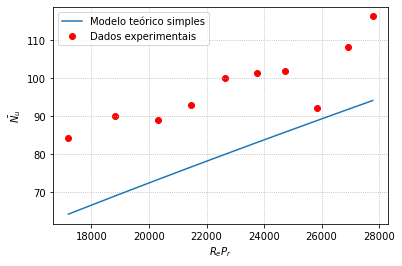

In [385]:
Pr = 0.72

def modelo(Re, a, b, c):
    return a*(Re**b)*(Pr**c)

coef, res = curve_fit(modelo, np.array(lista_re)*Pr, df_n.T.mean().values, p0=[0.668, 0.529, 1.529])

xres=np.linspace(max(lista_re), min(lista_re), 100)
fig, ax = plt.subplots()
ax.set(ylabel=r'$\bar{N_u}$', xlabel=r'$R_e P_r$')
ax.scatter(np.array(lista_re)*Pr, df_n.T.mean().values,  color='red',label='Dados experimentais')
#ax.plot(np.array(lista_re)*Pr, modelo(np.array(lista_re), *coef), label='Modelo teórico calibrado')
ax.plot(np.array(lista_re)*Pr, modelo(np.array(lista_re), *[0.023, 4/5, 0.4]), label='Modelo teórico simples')

ax.grid(ls='dotted')
ax.legend()
fig.savefig('nu_medio.pdf', bbox_inches='tight')
print(coef)

In [386]:
df_erro = pd.DataFrame({'m_dot':lista_m, 'Nux':df_n.T.mean().values,'Nut':modelo(np.array(lista_re), *[0.023, 4/5, 0.4])})
df_erro['erro'] = abs(df_erro['Nux'] - df_erro['Nut'])/df_erro['Nut']*100
df_erro

,m_dot,Nux,Nut,erro
0,0.020727,116.331111,94.139531,23.573073
1,0.020095,108.203042,91.835787,17.822306
2,0.019292,92.169130,88.888392,3.690850
3,0.018451,101.796336,85.775754,18.677285
4,0.017731,101.518359,83.087383,22.182640
5,0.016892,100.093062,79.926465,25.231438
6,0.016005,92.875399,76.550632,21.325451
7,0.015158,89.079918,73.292927,21.539583
8,0.014047,90.152836,68.963707,30.725043
9,0.012831,84.112859,64.144508,31.130258
